In [1]:
# Core Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from scipy import stats
from scipy.stats import randint, uniform

pd.options.display.float_format = '{:.2f}'.format

In [2]:
from pathlib import Path
import tensorflow as tf

## IMPORT & EXPLORE

#### FUNCTIONS

In [3]:
def directory_files( directory,
                     item_type = None):

    directory_files = sorted([ str(path) for path in directory.glob(f'*.{item_type}') ])

    return directory_files

In [4]:
def item_labeling( files ):

    item_labels = [ 0 if 'Proper' in path else 
                    1 if 'Improper' in path else
                    -1 for path in files ]
    
    return np.array(item_labels)


In [5]:
def load_images(image_paths, target_size=(224, 224)):
    loaded_images = []
    for path in image_paths:
        try:
            # Read and decode the image as grayscale (force 1 channel)
            image = tf.io.read_file(path)
            image = tf.image.decode_image(image, channels=1)  # Force grayscale format

            # Resize the image to the target size
            image = tf.image.resize(image, target_size)

            # Normalize the pixel values to [0, 1]
            image = image / 255.0

            # Set the shape explicitly to ensure consistency
            image.set_shape((target_size[0], target_size[1], 1))

            loaded_images.append(image)
        except Exception as e:
            print(f"Error loading image at {path}: {e}")

    return loaded_images

In [6]:
def display_examples(images, labels, num_examples=5):
    plt.figure(figsize=(10, 10))
    
    for i in range(num_examples):
        ax = plt.subplot(1, num_examples, i + 1)
        ax.imshow(images[i])  # Display the image
        ax.set_title(f"Label: {labels[i]}")  # Display the label
        ax.axis("off")  # Hide axes
    
    plt.show()

#### DATA

##### DIRECTORY FILES

In [7]:
improper_scooter_parking_images_directory = Path(r"C:\Users\User\Desktop\Improper escooter parking detection\data\Images\Improper")

proper_scooter_parking_images_directory = Path(r"C:\Users\User\Desktop\Improper escooter parking detection\data\Images\Proper")


In [8]:
improper_scooter_parking_images_directory = directory_files( directory = improper_scooter_parking_images_directory ,item_type = 'jpg')+directory_files( directory = improper_scooter_parking_images_directory ,item_type = 'png') 

proper_scooter_parking_images_directory = directory_files( directory = proper_scooter_parking_images_directory ,item_type = 'jpg')+directory_files( directory = proper_scooter_parking_images_directory ,item_type = 'png') 

In [10]:
scooter_parking_images_directory  = pd.Series(improper_scooter_parking_images_directory + proper_scooter_parking_images_directory).sample(frac = 1,
                                                                                                                                         replace = False,
                                                                                                                                         random_state = 42)

scooter_parking_images_directory = list(scooter_parking_images_directory)




##### LABELING

In [12]:
scooter_parking_labels = item_labeling( scooter_parking_images_directory )

#### LOADING

In [15]:
scooter_parking_images = np.array(load_images( image_paths = scooter_parking_images_directory,
                                               target_size=(224,224) ) )

Error loading image at C:\Users\User\Desktop\Improper escooter parking detection\data\Images\Proper\5e732d179ce70.png: {{function_node __wrapped__DecodeImage_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeImage] name: 


##### DISPLAY

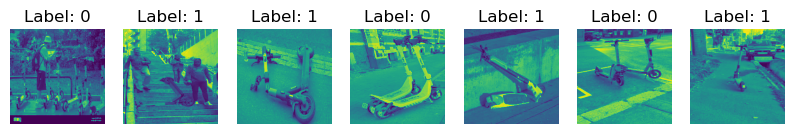

In [18]:
display_examples( images = scooter_parking_images, 
                  labels = scooter_parking_labels,
                  num_examples = 7 )

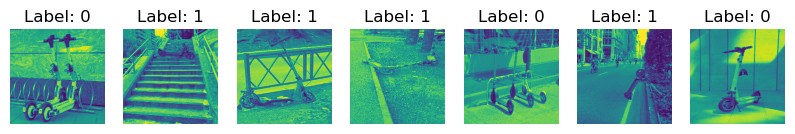

In [19]:
display_examples( images = scooter_parking_images[42:], 
                  labels = scooter_parking_labels[42:],
                  num_examples = 7 )

NOTE : In this version , grayscale was used in order to optimize model 

## SAVE

In [20]:
np.savez_compressed( 'scooter_parking.npz',
                     images = scooter_parking_images,
                     labels = scooter_parking_labels ) 

In [23]:
#### TEST LOADING

scooter_parking_array_path = (r"C:\Users\User\Desktop\Improper escooter parking detection\data\arrays\scooter_parking.npz")

scooter_parking_images = np.load(scooter_parking_array_path)['images']

scooter_parking_labels = np.load(scooter_parking_array_path)['labels']

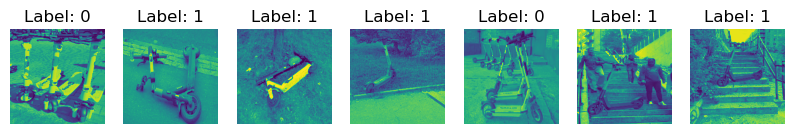

In [24]:
display_examples( images = scooter_parking_images[62:], 
                  labels = scooter_parking_labels[62:],
                  num_examples = 7 )

NOTE : Image Transofrmaton will be applied in the next notebook

## ADDITIONAL : RGB USAGE FOR TRANSFER LEARNING

In [25]:
def load_images_rgb(image_paths, target_size=(224, 224)):
    loaded_images = []
    for path in image_paths:
        try:
            # Read and decode the image as RGB (3 channels)
            image = tf.io.read_file(path)
            image = tf.image.decode_image(image, channels=3)  # Force RGB format

            # Resize the image to the target size
            image = tf.image.resize(image, target_size)

            # Normalize the pixel values to [0, 1]
            image = image / 255.0

            # Set the shape explicitly to ensure consistency
            image.set_shape((target_size[0], target_size[1], 3))

            loaded_images.append(image)
        except Exception as e:
            print(f"Error loading image at {path}: {e}")

    return loaded_images


In [26]:
scooter_parking_images_rgb = np.array(load_images_rgb( image_paths = scooter_parking_images_directory,
                                                       target_size=(224,224) ) )

Error loading image at C:\Users\User\Desktop\Improper escooter parking detection\data\Images\Proper\5e732d179ce70.png: {{function_node __wrapped__DecodeImage_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeImage] name: 


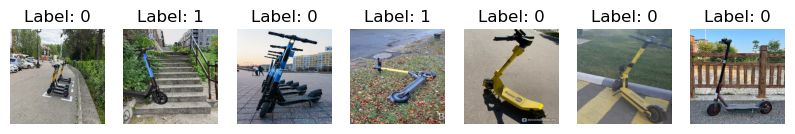

In [29]:
display_examples( images = scooter_parking_images_rgb[92:], 
                  labels = scooter_parking_labels[92:],
                  num_examples = 7 )

In [30]:
np.savez_compressed( 'scooter_parking_rgb.npz',
                     images = scooter_parking_images_rgb,
                     labels = scooter_parking_labels ) 